In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from sklearn.datasets import fetch_openml
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()

In [8]:
# number of trees used
print('Number of Trees used : ', model.n_estimators)

Number of Trees used :  100


In [9]:

model.fit(X_train,y_train)


RandomForestClassifier()

In [10]:
predict= model.predict(X_train)
predict

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
cm= metrics.confusion_matrix(y_train,model.predict(X_train))
cm

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4684,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4177,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4351,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4072,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3795,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4137,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4401,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4063,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4188]])

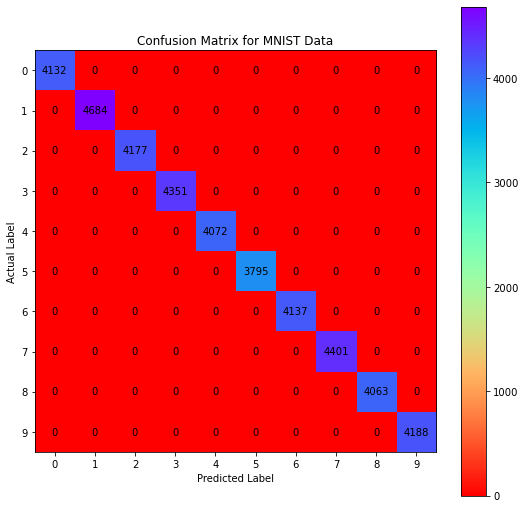

In [12]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(y_train,model.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :100.0 %


Looks overfitted 

Hyper-parameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [16]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [17]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [18]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.6min
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 14.3min finished


CPU times: user 24.6 s, sys: 1.25 s, total: 25.8 s
Wall time: 14min 24s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [19]:
rf_best = grid_search.best_estimator_

In [20]:
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [21]:
cm= metrics.confusion_matrix(y_train,rf_best.predict(X_train))
cm

array([[4087,    0,    0,    1,    4,    3,   22,    1,   12,    2],
       [   0, 4642,   14,    7,    5,    1,    7,    2,    4,    2],
       [  11,   14, 4081,    7,   16,    0,    2,   27,   17,    2],
       [   3,   23,   33, 4192,    0,    5,    7,   30,   32,   26],
       [   1,   16,    6,    0, 3959,    0,   14,    7,    2,   67],
       [   8,    8,    3,   32,    4, 3698,   29,    1,    4,    8],
       [  13,   10,    1,    0,    3,   12, 4092,    0,    6,    0],
       [   2,   29,   26,    1,   11,    0,    0, 4284,    2,   46],
       [  12,   37,   10,   26,   12,    5,   12,    5, 3922,   22],
       [  16,   17,    4,   60,   19,    1,    2,   47,   19, 4003]])

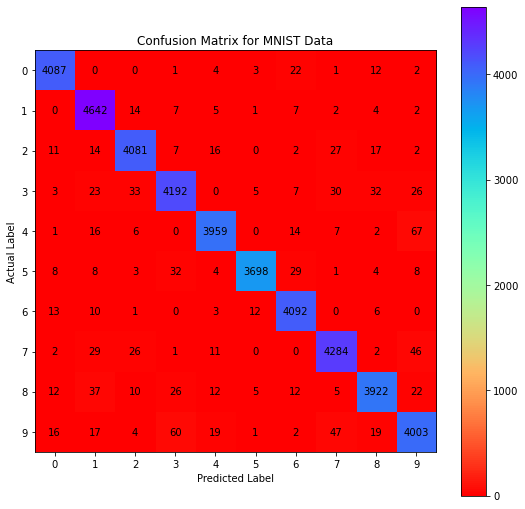

In [22]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [23]:
trainaccuracy= accuracy_score(y_train,rf_best.predict(X_train))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :97.52 %


In [24]:
# predict result
result = model.predict(test)


result = pd.Series(result,name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

